In [3]:
"""
Notebook usage: 

Plots:
    1. Throughput for all sharding scenarios from one experiment.

Setup:
    In order to run, change the DATA_PATHS to corresponding files.
    To show only 2 and 3 shards, comment out the section with no shards.

Note: it is not guaranteed that the plotting will work for new data. Some of the variables where changed by hand,
 and need to be changed again when new data is plotted.
"""
%matplotlib widget
import pandas as pd
import matplotlib.pyplot as plt
import datetime
DATA_PATH_NO_SHARDS = "Results_benchmark_start1\Sorted_Results11_Shards1_07-02-2022_16-52-42.txt.csv"
DATA_PATH_2_SHARDS = "Results_benchmark_start1\Sorted_Results9_Shards2_07-02-2022_13-42-32.txt.csv"
DATA_PATH_3_SHARDS = "Results_benchmark_start1\Sorted_Results10_Shards3_07-02-2022_14-58-06.txt.csv"

5400.206272189349


[]

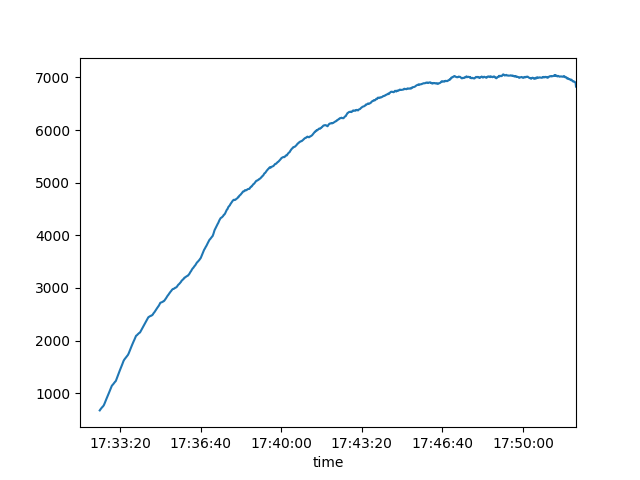

In [4]:
### NO SHARDS
df: pd.DataFrame = pd.read_csv(DATA_PATH_NO_SHARDS)
df_responses = df[df.action == "ReceivedResponse"]
df_responses = df_responses[["time","latency"]]
df_responses["time"] = pd.to_datetime(df_responses["time"])
# Start: 2022-02-06 22:00:28.762505
df_responses["time"] = df_responses["time"].apply(lambda x: x-datetime.datetime(2022, 2, 6,22,00,28,762505))
df_responses = df_responses.set_index("time")
seconds = df_responses.latency.resample("S").count()
seconds = seconds.rolling(50).mean()
print(seconds.mean())
ax = seconds.plot(label="No Shards")
ax.plot()

1348.862992392223


[]

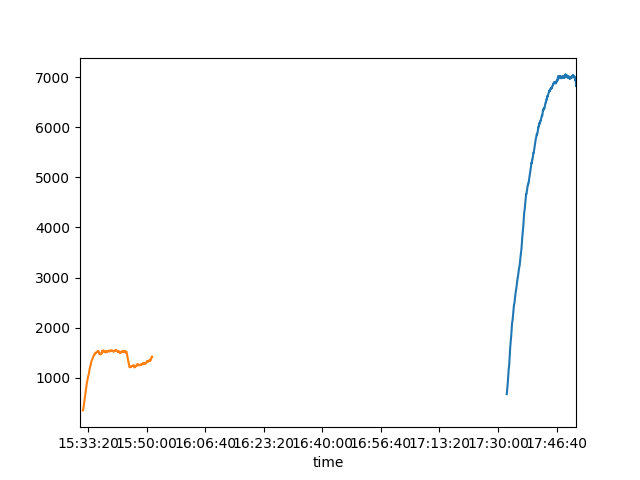

In [5]:
### 2 SHARDS
df: pd.DataFrame = pd.read_csv(DATA_PATH_2_SHARDS)
df_responses = df[df.action == "ReceivedResponse"]
df_responses = df_responses[["time","latency"]]
df_responses["time"] = pd.to_datetime(df_responses["time"])
# Start: 2022-02-06 20:50:57.016553
df_responses["time"] = df_responses["time"].apply(lambda x: x-datetime.datetime(2022, 2, 6,20,50,57,16553))
df_responses = df_responses.set_index("time")
seconds = df_responses.latency.resample("S").count()
seconds = seconds.rolling(50).mean()
print(seconds.mean())
ax = seconds.plot(label="2 Shards")
ax.plot()

1459.926086221471


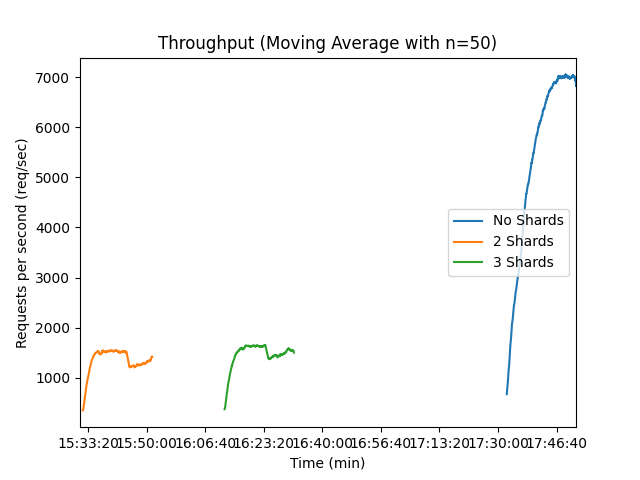

In [6]:
### 3 SHARDS
df: pd.DataFrame = pd.read_csv(DATA_PATH_3_SHARDS)
df_responses = df[df.action == "ReceivedResponse"]
df_responses = df_responses[["time","latency"]]
df_responses["time"] = pd.to_datetime(df_responses["time"])
# Start: 2022-02-06 21:26:11.309608
df_responses["time"] = df_responses["time"].apply(lambda x: x-datetime.datetime(2022, 2, 6,21,26,11,309608))
df_responses = df_responses.set_index("time")
seconds = df_responses.latency.resample("S").count()
seconds = seconds.rolling(50).mean()
print(seconds.mean())
ax = seconds.plot(label="3 Shards",ylabel= "Requests per second (req/sec)", xlabel="Time (min)", title="Throughput (Moving Average with n=50)")
plt.legend(loc='center right')
plt.show()